# Scraping Tax-Payers based on company names

In [16]:
# Importing neccesary libraries
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import re
import time

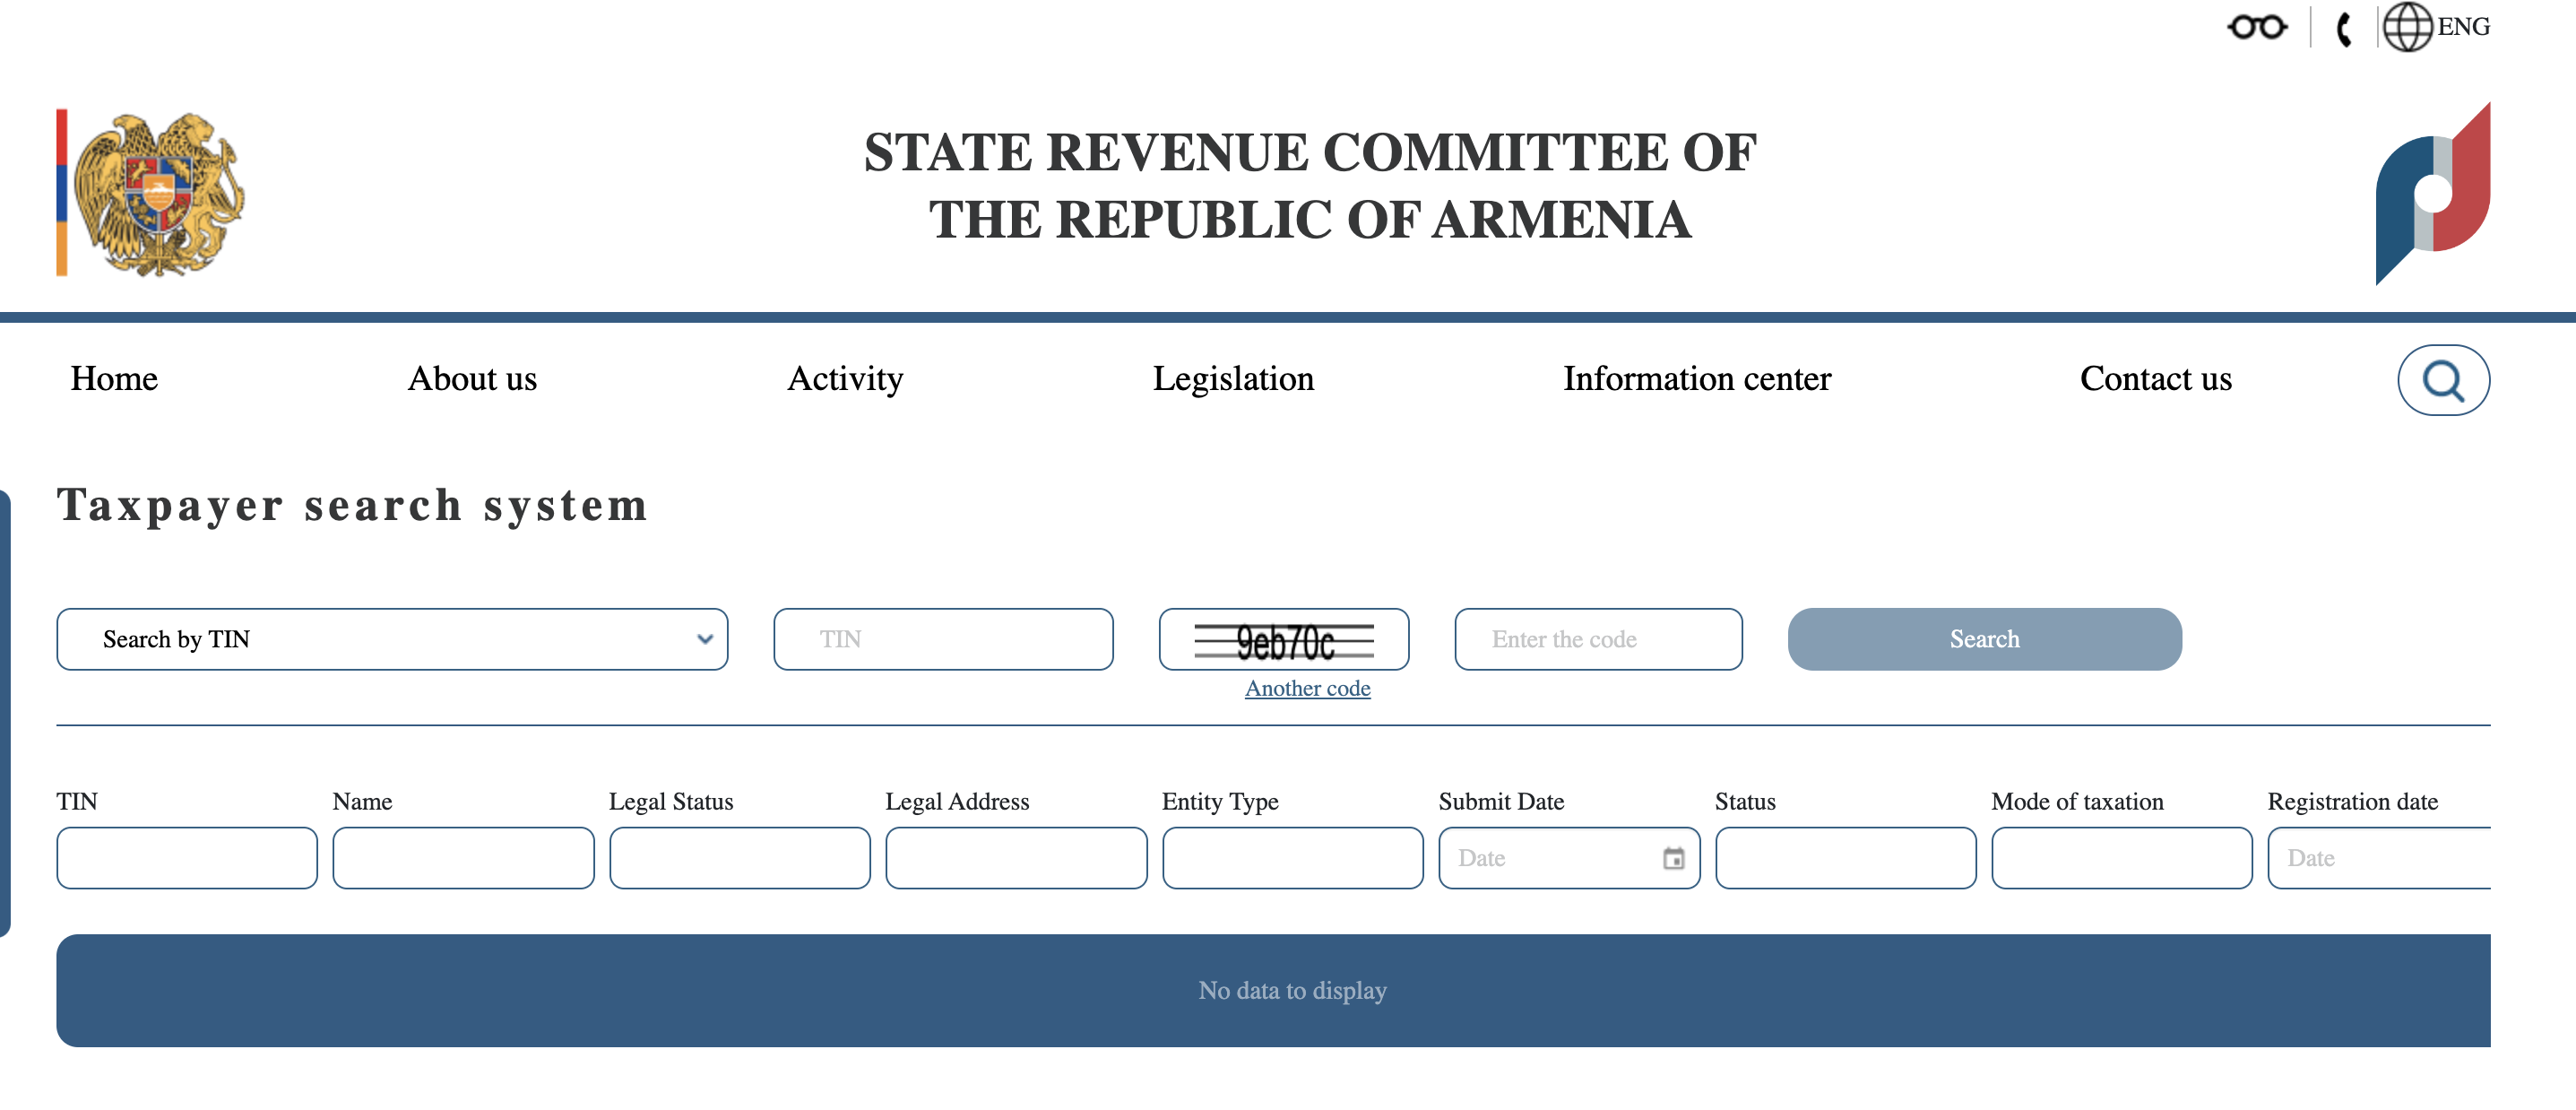

In [13]:
# Website screenshot

from IPython.display import Image
PATH = "path to image"
Image(filename = PATH + "website.png", width=900, height=900)

In [14]:
# Importing excel spreadsheet with company names 
# There are excel data cleaning and concatenating steps have been done to ensure that names are found

df = pd.read_excel(r"path to /Companies.xlsx")
df.head()

,ՀՎՀՀ,Կազմակերպություն1,Կազմակերպություն2,Կազմակերպություն,2019,2020,2021,2022
0,NaN,ß,"""ԱԴՈԲ ԴԻՎԵԼՈՓՄԵՆԹ"",",ԱԴՈԲ ԴԻՎԵԼՈՓՄԵՆԹ,"""ԱԴՈԲ ԴԻՎԵԼՈՓՄԵՆԹ""",NaN,NaN,NaN
1,NaN,«ԱԼԵՔՍ ԸՆԴ ՀՈԼԴԻՆԳ,"""ԱԼԵՔՍ ԸՆԴ ՀՈԼԴԻՆԳ"",",ԱԼԵՔՍ ԸՆԴ ՀՈԼԴԻՆԳ,"""ԱԼԵՔՍ ԸՆԴ ՀՈԼԴԻՆԳ""",NaN,NaN,NaN
2,NaN,«ԱԼԵՔՍԱՐՍ,"""ԱԼԵՔՍԱՐՍ"",",ԱԼԵՔՍԱՐՍ,"""ԱԼԵՔՍԱՐՍ""",ԱԼԵՔՍԱՐՍ,NaN,NaN
3,NaN,«ԱԼՖԱ-ՖԱՐՄ,"""ԱԼՖԱ-ՖԱՐՄ"",",ԱԼՖԱ-ՖԱՐՄ,"""ԱԼՖԱ-ՖԱՐՄ""",ԱԼՖԱ-ՖԱՐՄ,NaN,NaN
4,NaN,«ԱԼՖԱ-ՖԱՐՄ ԻՄՊՈՐՏ,"""ԱԼՖԱ-ՖԱՐՄ ԻՄՊՈՐՏ"",",ԱԼՖԱ-ՖԱՐՄ ԻՄՊՈՐՏ,"""ԱԼՖԱ-ՖԱՐՄ ԻՄՊՈՐՏ""",ԱԼՖԱ-ՖԱՐՄ ԻՄՊՈՐՏ,NaN,NaN


In [15]:
# Defining "Կազմակերպություն" column values as a name input

a = df["Կազմակերպություն"]

In [17]:
# Create a Chrome WebDriver instance
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)

url = "https://src.taxservice.am/am/taxpayerSearchSystemPage/112"

driver.get(url)

# Creating an empty dataframe with columns
columns = [
    "ՀՎՀՀ",
    "Անվանում",
    "Տեսակ",
    "Հասցե",
    "Գործունեություն",
    "Գրանցման ամսաթիվ",
    "Կարգավիճակ",
    "Վճարողի Համար",
    "Կարգավիճակի Փոփոխման Ամսաթիվ"
]
df = pd.DataFrame(columns=columns)

# List of names to iterate through
name = a

df_list = []

try:
    for company in name:
        # Find the input field by its XPath
        input_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="app"]/main/div/div/div[1]/div/div[2]/div[2]/input'))
        )
        # Click on the input field
        input_element.click()
        time.sleep(6)

        # Use Keys.COMMAND + 'a' to select all text, then press Keys.DELETE to clear the input field
        input_element.send_keys(Keys.COMMAND + 'a', Keys.DELETE)

        # Set the tax type in the cleared input field
        input_element.send_keys(company)
        
        # Wait for the page to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.search-container__table')))

        # Find the input field for the page number
        page_input = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'input.form-control'))
        )

        # Check if there are search results
        if not driver.find_elements(By.CSS_SELECTOR, 'div.empty-box'):
            # Find all rows in the table
            rows = driver.find_elements(By.CSS_SELECTOR, 'div.search-container__row')

            page_data = []

            for row in rows:
                data = [cell.text.strip() for cell in row.find_elements(By.CSS_SELECTOR, 'div')]
                page_data.append(data)

            # Append the data to the list
            df_list.append(pd.DataFrame(page_data, columns=columns))

        # Wait for a short time to ensure the input is cleared before sending new keys
        time.sleep(1)

except Exception as e:
    print("Error:", str(e))

finally:
    # Close the WebDriver session
    driver.quit()

# Concatenate all DataFrames in the list
df = pd.concat(df_list, ignore_index=True)

# Save the scraped data
df.to_csv(fr"path to/tax_data.csv", index=False)   # Save to CSV if needed


Error: Message: 
Stacktrace:
0   chromedriver                        0x0000000104f004cc chromedriver + 4162764
1   chromedriver                        0x0000000104ef8654 chromedriver + 4130388
2   chromedriver                        0x0000000104b4fbc0 chromedriver + 293824
3   chromedriver                        0x0000000104b96040 chromedriver + 581696
4   chromedriver                        0x0000000104bd5ab0 chromedriver + 842416
5   chromedriver                        0x0000000104b896bc chromedriver + 530108
6   chromedriver                        0x0000000104b8a930 chromedriver + 534832
7   chromedriver                        0x0000000104ec5df8 chromedriver + 3923448
8   chromedriver                        0x0000000104eca3cc chromedriver + 3941324
9   chromedriver                        0x0000000104eae028 chromedriver + 3825704
10  chromedriver                        0x0000000104ecaf2c chromedriver + 3944236
11  chromedriver                        0x0000000104ea06e4 chromedriver + 

In [18]:
df.shape

(120, 9)

In [19]:
df.tail()

,ՀՎՀՀ,Անվանում,Տեսակ,Հասցե,Գործունեություն,Գրանցման ամսաթիվ,Կարգավիճակ,Վճարողի Համար,Կարգավիճակի Փոփոխման Ամսաթիվ
115,00147117,«ԱԳՐՈՏԵԽՆԻԿ ԱՄ ՓԱԿ ԲԱԺՆԵՏԻՐԱԿԱՆ ԸՆԿԵՐՈՒԹՅԱՆ ՀԱ...,Օտարերկրյա իրավաբանական անձի մասնաճյուղ,ԴԱՎԻԹԱՇԵՆ ՀԱԹ Բ-2 137 29 ԲՆ.,G46.61.0,2015-09-29,Գործող,ԱԱՀ վճարող,2023-01-01
116,01003256,«ԱԴԱՄԻՈՒՄ»,Սահմանափակ պատասխանատվությամբ ընկերություն (ՍՊԸ),ԵՐԵՎԱՆ ՌՈՒԲԻՆՅԱՆՑ Փ. 21/3 19,G46.34.1,2005-11-10,Գործող,ԱԱՀ վճարող,2023-01-01
117,02659649,«ԱԼԵՔՍԱՆԴՐ ՀՈԹԵԼ»,Սահմանափակ պատասխանատվությամբ ընկերություն (ՍՊԸ),ԵՐԵՎԱՆ ԱԲՈՎՅԱՆ Փ. 3/4,I55.10.1,2017-04-04,Գործող,ԱԱՀ վճարող,2023-01-01
118,02588485,«ԱՅՅՈՒՆԵԹՎՈՐՔՍ»,Սահմանափակ պատասխանատվությամբ ընկերություն (ՍՊԸ),ԿԵՆՏՐՈՆ ՊՈՒՇԿԻՆԻ Փ. 38/1 55 շին.,J62.01.0,2008-03-10,Գործող,ԱԱՀ վճարող,2023-01-01
119,02588485,«ԱՅՅՈՒՆԵԹՎՈՐՔՍ»,Սահմանափակ պատասխանատվությամբ ընկերություն (ՍՊԸ),ԿԵՆՏՐՈՆ ՊՈՒՇԿԻՆԻ Փ. 38/1 55 շին.,J62.01.0,2008-03-10,Գործող,ԱԱՀ վճարող,2023-01-01
